# Técnicas de visão computacional aplicáveis ao projeto:

Instalação de bibliotecas necessárias:

In [3]:
!pip3 install opencv-python
!pip3 install numpy
!pip3 install matplotlib

  Using cached https://files.pythonhosted.org/packages/7b/d2/a2dbf83d4553ca6b3701d91d75e42fe50aea97acdc00652dca515749fb5d/opencv_python-4.1.0.25-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c1/e2/4db8df8f6cddc98e7d7c537245ef2f4e41a1ed17bf0c3177ab3cc6beac7f/numpy-1.16.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c1/e2/4db8df8f6cddc98e7d7c537245ef2f4e41a1ed17bf0c3177ab3cc6beac7f/numpy-1.16.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e9/69/f5e05f578585ed9935247be3788b374f90701296a70c8871bcd6d21edb00/matplotlib-3.0.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.

## Detecção de uma viga e diferentes cores em sua superfície lateral:

Imports:

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Leitura da imagem de uma viga colorida simples

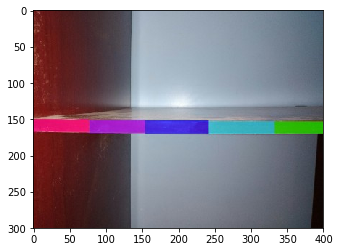

In [5]:
img = cv2.imread('img/viga400px.jpg')
plt.imshow(img[:, :, ::-1])

Detecção e binarização das cores escolhidas. Nesse caso não seria necessário fazer a binarização, as linha foram detectadas sem a necessidade de binarizar. Porém, deixarei a binarização pois pode ser útil para resolver algum problema no decorrer do projeto.

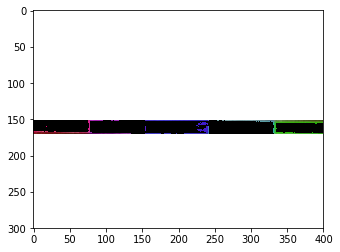

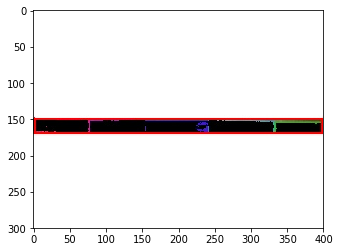

In [39]:
img = cv2.imread('img/viga400px.jpg')

w, h = img.shape[:2]

for i in range (0, w):
    for j in range (0, h):
        if(i <= 150 or i >= 170):
            img[i][j] = 255,255,255
        elif(img[i][j][2] >= 220 and img[i][j][1] >= 10 and img[i][j][0] >= 100):
            img[i][j] = 0,0,0
        elif(img[i][j][2] >= 150 and img[i][j][1] >= 10 and img[i][j][0] >= 180):
            img[i][j] = 0,0,0
        elif(img[i][j][2] >= 40 and img[i][j][1] >= 30 and img[i][j][0] >= 200):
            img[i][j] = 0,0,0
        elif(img[i][j][2] >= 40 and img[i][j][1] >= 150 and img[i][j][0] >= 170):
            img[i][j] = 0,0,0 
        elif(img[i][j][2] >= 30 and img[i][j][1] >= 170 and img[i][j][0] <= 10):
            img[i][j] = 0,0,0
plt.imshow(img[:,:,::-1])
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,50)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    cv2.line(img,(x1,y1-20),(x2,y2-20),(0,0,255),2)
    cv2.line(img,(2,y1),(2,y1-20),(0,0,255),2)
    cv2.line(img,(h-2,y1),(h-2,y1-20),(0,0,255),2)

cv2.imwrite('img/houghlines.jpg',img)
r = cv2.imread('img/houghlines.jpg')
plt.imshow(r[:,:,::-1])
plt.show()


Agora que foi encontrada a "viga" podemos separar as cores:


Abrirei novamente a imagem original colocando a detecção que foi encontrada

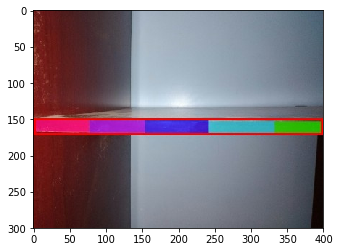

In [81]:
img = cv2.imread('img/viga400px.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,50)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    cv2.line(img,(x1,y1-20),(x2,y2-20),(0,0,255),2)
    cv2.line(img,(2,y1),(2,y1-20),(0,0,255),2)
    cv2.line(img,(h-2,y1),(h-2,y1-20),(0,0,255),2)

cv2.imwrite('img/detected.jpg',img)
r = cv2.imread('img/detected.jpg')
plt.imshow(r[:,:,::-1])
plt.show()

Detectar as diferentes cores:

True

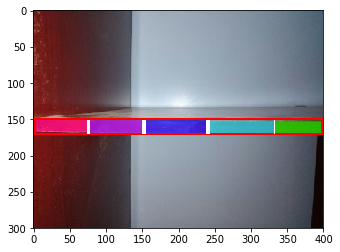

In [83]:
img2 = img

for i in range(4, h-4):
    dif0 = abs(abs(int(img[y1-10][i][0])) - abs(int(img[y1-10][i+1][0])))
    dif1 = abs(abs(int(img[y1-10][i][1])) - abs(int(img[y1-10][i+1][1])))
    dif2 = abs(abs(int(img[y1-10][i][2])) - abs(int(img[y1-10][i+1][2])))
    if((dif0 >= 8 and dif1 >= 8)  or (dif0 >= 8 and dif2 >= 8) or (dif1 >= 8 and dif2 >= 8)):
        cv2.line(img2,(i,y1),(i,y1-18),(255,255,255),1)
plt.imshow(img2[:,:,::-1])
cv2.imwrite('img/divisions.jpg',img2)

É possível observar que entre algumas cores a divisão em branco é mais visível que entre outras. Isso se dá por conta da intensidade das cores colocadas. O quanto mais distante for uma cor da outra mais preciso fica nossa identificação.

# Detecção de curva em uma superfície plana

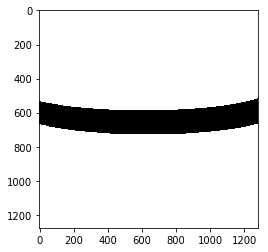

In [86]:
img = cv2.imread('img/deformacao.jpg')
plt.imshow(img)